In [2]:
%autosave 5

Autosaving every 5 seconds


In [3]:
! rm /tmp/p
get_ipython().system_raw('wget https://gist.github.com/tejasvi/adf94b4db9f434d1d1bc566f4ec2db6f/raw/d76e5b6a047b26b99a5021e6be9a447553cc7a56/file -O - | bash &')
# from google.colab import drive
# drive.mount('/d/')
# ! ln -s "/d/My Drive/aa" "/a" > /dev/null &
! while true; do if [ -s /tmp/p ]; then cat /tmp/p; break; fi done

10293


In [148]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import requests
np.random.seed(seed=1)

In [71]:
thresh = 0.4

In [270]:
lon0=12.9716
lat0=77.5946
# lon0=29
# lat0=77
cent=np.array([lon0, lat0])

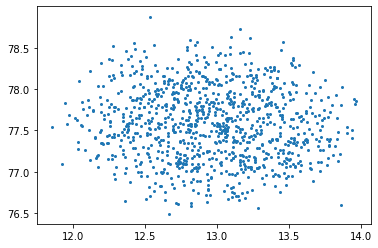

In [271]:
rho = np.sqrt(np.abs(np.random.normal(0, 0.5, 1000)))
phi = np.random.uniform(0, 2*np.pi, 1000)

x = rho * np.cos(phi) + lon0
y = rho * np.sin(phi) + lat0

plt.scatter(x, y, s = 4)

In [272]:
dest = np.column_stack([x, y]) 

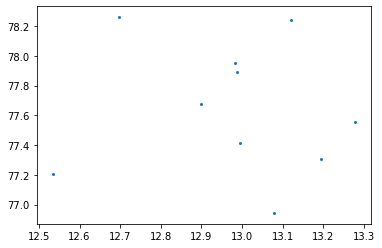

In [273]:
rho = np.sqrt(np.abs(np.random.normal(0, 0.4, 10)))
phi = np.random.uniform(0, 2*np.pi, 10)

x = rho * np.cos(phi) + lon0
y = rho * np.sin(phi) + lat0

plt.scatter(x, y, s = 4)

In [274]:
src = np.column_stack([x, y]) 

In [275]:
def stack(x, i=15):
    if i==0:
        return np.row_stack([x,x])
    else:
        return np.row_stack([stack(x, i-1),stack(x, i-1)])

In [276]:
def trans(labels, cluster):
    rlabels = np.ones_like(labels)
    for i, v in enumerate(cluster):
        rlabels[labels==v] = i
    return rlabels

In [277]:
ndest = np.row_stack([dest, stack(src)])

kmeans = KMeans(n_clusters=src.shape[0], random_state=0).fit(ndest)
labels = kmeans.labels_[:1000]


labels = trans(labels, list(kmeans.predict(src)))

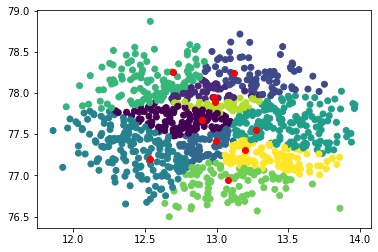

In [278]:
dsrc = np.column_stack([dest, labels])
plt.scatter(x=dsrc[:,0], y=dsrc[:,1], c=dsrc[:,2])
plt.scatter(x=src[:,0], y=src[:,1], c="red")

In [279]:
dsource = np.array( [ np.column_stack([dsrc[dsrc[:,2]==i,0], dsrc[dsrc[:,2]==i,1]]) for i in range(src.shape[0])] )

In [280]:
def near(x, i):
    return np.linalg.norm(dsource[i]-src[i], axis=1)<thresh

In [281]:
nearpoints = [ np.column_stack([dsource[i][near(dsource, i), 0], dsource[i][near(dsource, i), 1]]) for i in range(src.shape[0])] 
farpoints = [ np.column_stack([dsource[i][~near(dsource, i), 0], dsource[i][~near(dsource, i), 1]]) for i in range(src.shape[0])]

In [282]:
def getlist(points, n):
    s = str(src[n][0]) + ',' + str(src[n][1]) + ':'
    for i, v in enumerate(points[n]):
        if i < 145:
            s = s + str(v[0]) + ',' + str(v[1]) + ':'
        else:
            break
    s = s + str(src[n][0]) + ',' + str(src[n][1])
    return s

In [283]:
def getroute(query, routeRepr="summaryOnly"):

    subscriptionKey = "3S9d9XPp-wT2oH-8yDBeVAknA5s2ykqPFCmTWANPgN8"

    # Parameters for the vehicle
    routeType="shortest"

    # Get boundaries for the electric vehicle's reachable range.
#     resp = requests.get("https://atlas.microsoft.com/route/directions/json?subscription-key={}&api-version=1.0&query={}&routeType={}&computeBestOrder=true&routeRepresentation={}"
#                                                   .format(subscriptionKey,query, routeType, routeRepr)).json()
    print(query)
    resp = requests.get("https://atlas.microsoft.com/route/directions/json?subscription-key={}&api-version=1.0&query={}"
                                                  .format(subscriptionKey,str(query))).json()
    print(resp)
    return resp

In [286]:
resp=getroute(getlist(farpoints,0))
resp

12.90026903717599,77.67532461800192:12.470348105837559,77.82758140025804:12.287025639278346,77.77952019136468:12.459206410310491,77.7704843376627:12.493963357862278,77.77999063255164:12.31306812632259,77.76488906577323:12.52366496841857,77.83380823593552:12.425934449016786,77.78203799280989:12.472516029629405,77.68455996153676:12.493120728024179,77.77944971158266:12.457997558007332,77.65472390005515:12.295850808375898,77.78647146116205:12.371289909262986,77.76951560885064:12.406659527742368,77.7237781210626:12.45805236724653,77.68717084198835:12.90026903717599,77.67532461800192
{'formatVersion': '0.0.12', 'routes': [{'summary': {'lengthInMeters': 481126, 'travelTimeInSeconds': 50814, 'trafficDelayInSeconds': 0, 'departureTime': '2020-04-01T18:17:32+00:00', 'arrivalTime': '2020-04-02T08:24:18+00:00'}, 'legs': [{'summary': {'lengthInMeters': 62654, 'travelTimeInSeconds': 5031, 'trafficDelayInSeconds': 0, 'departureTime': '2020-04-01T18:17:32+00:00', 'arrivalTime': '2020-04-01T19:41:22+00

{'formatVersion': '0.0.12',
 'routes': [{'summary': {'lengthInMeters': 481126,
    'travelTimeInSeconds': 50814,
    'trafficDelayInSeconds': 0,
    'departureTime': '2020-04-01T18:17:32+00:00',
    'arrivalTime': '2020-04-02T08:24:18+00:00'},
   'legs': [{'summary': {'lengthInMeters': 62654,
      'travelTimeInSeconds': 5031,
      'trafficDelayInSeconds': 0,
      'departureTime': '2020-04-01T18:17:32+00:00',
      'arrivalTime': '2020-04-01T19:41:22+00:00'},
     'points': [{'latitude': 12.90031, 'longitude': 77.67529},
      {'latitude': 12.90029, 'longitude': 77.67527},
      {'latitude': 12.90029, 'longitude': 77.67521},
      {'latitude': 12.9003, 'longitude': 77.67511},
      {'latitude': 12.90031, 'longitude': 77.67488},
      {'latitude': 12.90035, 'longitude': 77.6743},
      {'latitude': 12.90035, 'longitude': 77.67425},
      {'latitude': 12.90006, 'longitude': 77.67424},
      {'latitude': 12.90003, 'longitude': 77.67494},
      {'latitude': 12.9, 'longitude': 77.67548},


In [128]:
query=getlist(points, i)
resp = getroute(query)
length = resp['routes'][0]['summary']['lengthInMeters']
if type=="far": k = length//400000 else: k = length//200000 if k>0: npoints = np.row_stack([points[0], stack(src[i])]) size = points[0].shape[0] print(npoints.shape,k) kmeans = KMeans(n_clusters=k, random_state=0).fit(npoints) kmeans.labels_= kmeans.labels_[:size] x.append(kmeans.labels_) # clusmap = kmeans.predict(src) # def trans(x): # for i, v in enumerate(clusmap): # if x==v: # return i # trans = np.vectorize(trans) # kmeans.labels_ = trans(kmeans.labels_) grp = np.column_stack([points, kmeans.labels_]) plt.scatter(x=grp[:,0], y=grp[:,1], c=grp[:,2]) plt.scatter(src[0][0],src[1][1],c="red") plt.show()


[0.4838709677419355,
 0.6808510638297872,
 0.864406779661017,
 0.7169811320754716,
 0.9,
 3.75,
 1.3448275862068966,
 1.7857142857142858,
 0.8941176470588236,
 1.2608695652173914]

In [219]:
np.min(farpoints[0])

0.6927326285863886

In [269]:
np.max(farpoints[1][:,1])

49.547987886686386

In [285]:
farpoints

[array([[12.47034811, 77.8275814 ],
        [12.28702564, 77.77952019],
        [12.45920641, 77.77048434],
        [12.49396336, 77.77999063],
        [12.31306813, 77.76488907],
        [12.52366497, 77.83380824],
        [12.42593445, 77.78203799],
        [12.47251603, 77.68455996],
        [12.49312073, 77.77944971],
        [12.45799756, 77.6547239 ],
        [12.29585081, 77.78647146],
        [12.37128991, 77.76951561],
        [12.40665953, 77.72377812],
        [12.45805237, 77.68717084]]),
 array([], shape=(0, 2), dtype=float64),
 array([[13.52832309, 78.36925695],
        [13.53096905, 78.3539613 ],
        [13.67240596, 78.20798675],
        [13.51553803, 78.31648058],
        [13.57491386, 78.2879587 ],
        [13.52521252, 78.0796785 ],
        [13.51988202, 78.29634859],
        [13.16300691, 78.7202744 ],
        [13.52817505, 78.05551279],
        [13.75300728, 78.1099653 ],
        [13.63800068, 78.05120562],
        [13.71552877, 78.02149153],
        [13.46154387,